# 1. 问题描述
### 本次作业中，自行选择2个数据集进行探索性分析与预处理：MovieLens 10M Dataset和Movies Dataset from Pirated Sites
# 2. 数据集选择
### 首先选择的是没有缺失值的数据集[MovieLens 10M Dataset](https://www.kaggle.com/datasets/amirmotefaker/movielens-10m-dataset-latest-version)

In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-10m-dataset-latest-version/ml-10M100K/tags.dat
/kaggle/input/movielens-10m-dataset-latest-version/ml-10M100K/split_ratings.sh
/kaggle/input/movielens-10m-dataset-latest-version/ml-10M100K/ratings.dat
/kaggle/input/movielens-10m-dataset-latest-version/ml-10M100K/README.html
/kaggle/input/movielens-10m-dataset-latest-version/ml-10M100K/allbut.pl
/kaggle/input/movielens-10m-dataset-latest-version/ml-10M100K/movies.dat


# 3. 数据分析要求
## 3.1 数据摘要和可视化
### （1）数据摘要
### a.标称属性，给出每个可能取值的频数
### b.数值属性，给出5数概括及缺失值的个数
### （2）数据可视化
### 使用直方图、盒图等检查数据分布及离群点
## 3.2 数据缺失的处理
###    这个数据集没有缺失值，不用处理


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# # 用来正常显示中文标签
# plt.rcParams["font.sans-serif"] = ["SimSun-ExtB"]
# # 用来正常显示负号
# plt.rcParams["axes.unicode_minus"] = False


In [42]:
def getRatings(file_path):
    rates = pd.read_table(
        file_path,
        engine='python',
        header=None,
        sep="::",
        names=["userID", "movieID", "rate", "timestamp"],
    )
    print("userID的范围为: <{},{}>"
          .format(min(rates["userID"]), max(rates["userID"])))
    print("movieID的范围为: <{},{}>"
          .format(min(rates["movieID"]), max(rates["movieID"])))
    print("评分值的范围为: <{},{}>"
          .format(min(rates["rate"]), max(rates["rate"])))
    print("数据总条数为:\n{}".format(rates.count()))
    print("数据前5条记录为:\n{}".format(rates.head(5)))
    df = rates["userID"].groupby(rates["userID"])
    print("用户评分记录最少条数为：{}".format(df.count().min()))

    scores = rates["rate"].groupby(rates["rate"]).count()
    # 图上添加数字
    for x, y in zip(scores.keys(), scores.values):
        plt.text(x, y + 2, "%.0f" % y, ha="center", va="bottom", fontsize=12)
    plt.bar(scores.keys(), scores.values, fc="b", tick_label=scores.keys())
    plt.xlabel("Score")
    plt.ylabel("UserNumber")
    plt.title("UserNumber-Score")
    plt.show()

userID的范围为: <1,71567>
movieID的范围为: <1,65133>
评分值的范围为: <0.5,5.0>
数据总条数为:
userID       10000054
movieID      10000054
rate         10000054
timestamp    10000054
dtype: int64
数据前5条记录为:
   userID  movieID  rate  timestamp
0       1      122   5.0  838985046
1       1      185   5.0  838983525
2       1      231   5.0  838983392
3       1      292   5.0  838983421
4       1      316   5.0  838983392
用户评分记录最少条数为：20


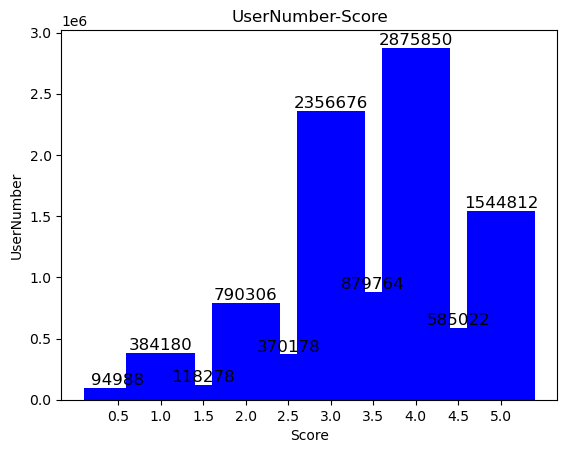

In [43]:
getRatings('/kaggle/input/movielens-10m-dataset-latest-version/ml-10M100K/ratings.dat')

In [44]:
def getMovies(file_path):
    movies = pd.read_table(
        file_path,
        engine='python',
        header=None,
        sep="::",
        names=["movieID", "title", "genres"]
    )

    print("movieID的范围为: <{},{}>"
          .format(min(movies["movieID"]), max(movies["movieID"])))
    print("数据总条数为:\n{}".format(movies.count()))
    moviesDict = dict()
    for line in movies["genres"].values:
        for one in line.split("|"):
            moviesDict.setdefault(one, 0)
            moviesDict[one] += 1

    print("电影类型总数为:{}".format(len(moviesDict)))
    print("电影类型分别为:{}".format(moviesDict.keys()))
    print(moviesDict)

    newMD = sorted(moviesDict.items(), key=lambda x: x[1], reverse=True)
    # 设置标签
    labels = [newMD[i][0] for i in range(len(newMD))]
    values = [newMD[i][1] for i in range(len(newMD))]
    # 与labels对应，数值越大离中心区越远
    explode = [x * 0.01 for x in range(len(newMD))]
    # 设置X轴 Y轴比例
    plt.axes(aspect=1)
    # labeldistance表示标签离中心距离，pctdistance表示百分百数据离中心区距离
    # autopct表示百分比的格式，shadow表示阴影
    plt.pie(
        x=values,
        labels=labels,
        explode=explode,
        autopct="%3.1f %%",
        shadow=False,
        labeldistance=1.1,
        startangle=0,
        pctdistance=0.8,
        center=(-1, 0),
    )
    # 控制位置：在bbox_to_anchor数组中，前者控制左右移动，后者控制上下
    # ncol控制图例所列的列数，默认为1
    plt.legend(loc=7, bbox_to_anchor=(1.3, 1.0), ncol=3, fancybox=True, shadow=True, fontsize=6)
    plt.show()

movieID的范围为: <1,65133>
数据总条数为:
movieID    10681
title      10681
genres     10681
dtype: int64
电影类型总数为:20
电影类型分别为:dict_keys(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Film-Noir', 'Western', '(no genres listed)'])
{'Adventure': 1025, 'Animation': 286, 'Children': 528, 'Comedy': 3703, 'Fantasy': 543, 'Romance': 1685, 'Drama': 5339, 'Action': 1473, 'Crime': 1118, 'Thriller': 1706, 'Horror': 1013, 'Mystery': 509, 'Sci-Fi': 754, 'IMAX': 29, 'Documentary': 482, 'War': 511, 'Musical': 436, 'Film-Noir': 148, 'Western': 275, '(no genres listed)': 1}


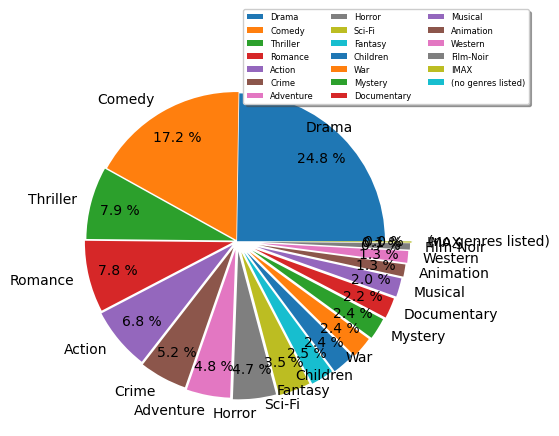

In [45]:
getMovies('/kaggle/input/movielens-10m-dataset-latest-version/ml-10M100K/movies.dat')

In [55]:
def getUsers(file_path):
    users = pd.read_table(
        file_path,
        engine='python',
        header=None,
        sep="::",
        names=["userID", "gender", "age", "Occupation", "zip-code"],
    )
    print("userID的范围为: <{},{}>".format(min(users["userID"]), max(users["userID"])))
    print("数据总条数为:\n{}".format(users.count()))

    usersAge = users["age"].groupby(users["age"]).count()
    print(usersAge)
    plt.figure(figsize=(10,6))
    plt.plot(
        usersAge.keys(),
        usersAge.values,
        label="UserAgeShow",
        linewidth=3,
        color="r",
        marker="o",
        markerfacecolor="blue",
        markersize=12,
    )
    # 图上添加数字
    for x, y in zip(usersAge.keys(), usersAge.values):
        plt.text(x, y+10, "%.0f" % y, ha="center", va="bottom", fontsize=12)
    plt.xlabel("UserAge")
    plt.ylabel("UserNumber")
    plt.title("UserNumber-UserAge")
    plt.show()

userID的范围为: <15,71556>
数据总条数为:
userID        95580
gender        95580
age           95564
Occupation    95580
zip-code          0
dtype: int64
age
!950's Superman TV show       1
!David O. Russell             1
!George Clooney               1
!George Lucas                 1
"A MÃ£o-de-Deus"              1
                             ..
Â                             1
Â¡Olivier Martinez!           1
Ã‰rase una vez en AmÃ©rica    1
Ø§Ø­Ø³Ø§Ø³Ø§ØªÙŠ              1
é˜®ä¸€é¸£                     1
Name: age, Length: 16528, dtype: int64


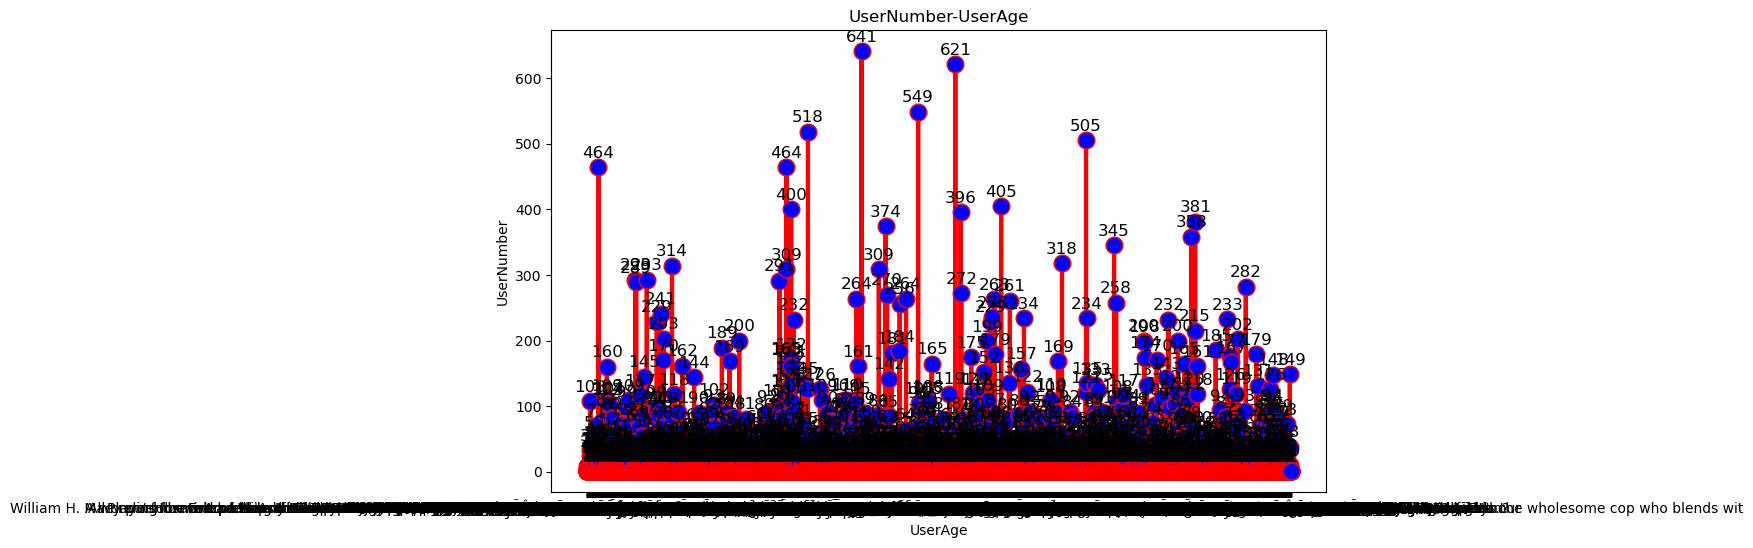

In [54]:
getUsers('/kaggle/input/movielens-10m-dataset-latest-version/ml-10M100K/tags.dat')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/movies-dataset-from-piracy-website/movies_dataset.csv


### 选择的第二个数据集是[Movies Dataset from Pirated Sites](https://www.kaggle.com/datasets/arsalanrehman/movies-dataset-from-piracy-website)

In [24]:
import pandas as pd

def csv_five_number_summary(path):
    # 读取csv文件
    df = pd.read_csv(path)
    
    # 输出每个字段的缺失值个数
    print('缺失值个数：')
    print(df.isnull().sum())
    
    # 剔除缺失值
    df = df.dropna()
    
    # 输出IMDb-rating、downloads、id、run_time、views字段的五数概括
    print('\nIMDb-rating的五数概括：')
    print(df['IMDb-rating'].describe())
    
    print('\ndownloads的五数概括：')
    print(df['downloads'].describe())
    
    print('\nid的五数概括：')
    print(df['id'].describe())
    
    print('\nrun_time的五数概括：')
    print(df['run_time'].describe())
    
    print('\nviews的五数概括：')
    print(df['views'].describe())



In [25]:
path = '/kaggle/input/movies-dataset-from-piracy-website/movies_dataset.csv'
csv_five_number_summary(path)

缺失值个数：
Unnamed: 0            0
IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64

IMDb-rating的五数概括：
count    9902.000000
mean        5.878489
std         1.195440
min         1.100000
25%         5.200000
50%         6.000000
75%         6.675000
max         9.300000
Name: IMDb-rating, dtype: float64

downloads的五数概括：
count     9902
unique    7068
top        472
freq       120
Name: downloads, dtype: object

id的五数概括：
count      9902.000000
mean     199595.375177
std      138431.948223
min           1.000000
25%       81579.500000
50%      211770.500000
75%      340104.750000
max      372092.000000
Name: id, dtype: float64

run_time的五数概括：
count     9902
unique     298
top         88
freq       

缺失值个数：
Unnamed: 0         0
IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

IMDb-rating的五数概括：
count    9902.000000
mean        5.878489
std         1.195440
min         1.100000
25%         5.200000
50%         6.000000
75%         6.675000
max         9.300000
Name: IMDb-rating, dtype: float64


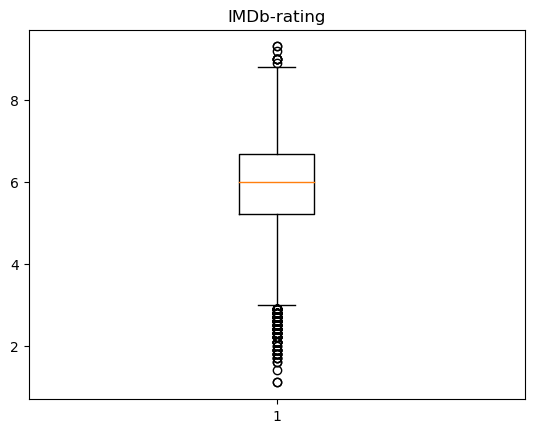


id的五数概括：
count      9902.000000
mean     199595.375177
std      138431.948223
min           1.000000
25%       81579.500000
50%      211770.500000
75%      340104.750000
max      372092.000000
Name: id, dtype: float64


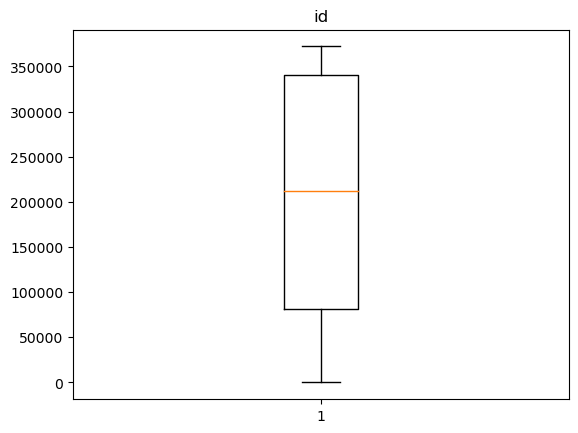

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

path = '/kaggle/input/movies-dataset-from-piracy-website/movies_dataset.csv'
df = pd.read_csv(path)

# 剔除缺失值的方法
# 1.将缺失部分剔除
df = df.dropna()

# 2.用最高频率值来填补缺失值
# # 找出'MPAA'字段最高频率的值
# most_frequent_MPAA = df['字段名'].mode().values[0]
# # 使用最高频率值填补'MPAA'字段的缺失值
# df['字段名'].fillna(most_frequent_MPAA, inplace=True)

# 输出每个字段的缺失值个数
print('缺失值个数：')
print(df.isnull().sum())

    
# 输出IMDb-rating、downloads、id、run_time、views字段的五数概括
print('\nIMDb-rating的五数概括：')
print(df['IMDb-rating'].describe())
plt.boxplot(df['IMDb-rating'])
plt.title('IMDb-rating')
plt.show()
    
# 输出IMDb-rating、downloads、id、run_time、views字段的五数概括
print('\nid的五数概括：')
print(df['id'].describe())
plt.boxplot(df['id'])
plt.title('id')
plt.show()

